In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\yjosh\Desktop\Score.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   30 non-null     float64
 1   Scores  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


Text(0.5, 1.0, 'HOURS VS PERCENTAGE')

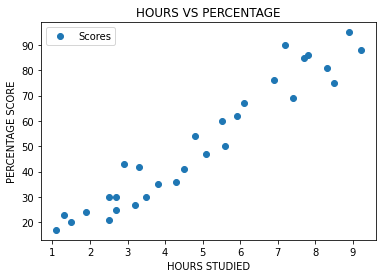

In [5]:
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('HOURS STUDIED')
plt.ylabel('PERCENTAGE SCORE')
plt.title('HOURS VS PERCENTAGE')

In [6]:
df.corr()

,Hours,Scores
Hours,1.00000,0.96214
Scores,0.96214,1.00000


In [7]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

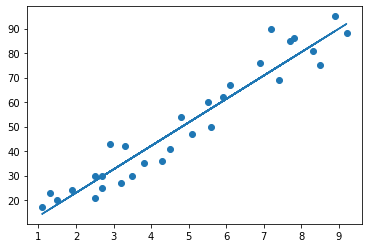

In [9]:
line = reg.coef_*X + reg.intercept_
plt.scatter(X,y)
plt.plot(X,line)

In [10]:
pred=reg.predict(X_test)

In [11]:
new = pd.DataFrame({'Actual': y_test , 'Predicted': pred})
new

,Actual,Predicted
0,27,34.471795
1,43,31.601763
2,42,35.428473
3,85,77.522282
4,50,57.432055
5,86,78.478959
6,36,44.995248
7,62,60.302087


In [12]:
hours = 9.25
own_pred = round(reg.predict([[9.25]]) [0],2)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = 92.35


In [13]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('R^2:',metrics.r2_score(y_test, pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))

R^2: 0.8579765274879578
Mean Absolute Error: 7.320691739227437
